# Part 0: Import 套件

In [9]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup

#資料處理套件
import pandas as pd
from datetime import date

#畫圖套件
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Part 1: 下載期交所 臺股期貨 每日交易行情
### 資料來源：[期交所 臺股期貨 每日交易行情](https://www.taifex.com.tw/cht/3/futDailyMarketReport)

In [2]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/futDailyMarketReport"
res = http.request(
     'POST',
      url,
      fields={
         'queryType': 2,
         'marketCode': 0,
         'commodity_id': 'TX',
         'queryDate': '2021/10/15',
         'MarketCode': 0,
         'commodity_idt': 'TX'
      }
 )

html_doc = res.data
html_doc

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\r\n\r\n\r\n<head><meta http-equiv="X-UA-Compatible" content="IE=edge"></head>\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="zh-TW" >\r\n\t\t<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n  <link rel="shortcut icon" type="image/x-icon" href="/cht/resources/front/cht/images/favicon.ico" />\r\n  <meta property="og:image" content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" />\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n  <title>\xe8\x87\xba\xe7\x81\xa3\xe6\x9c\x9f\xe8\xb2\xa8\xe4\xba\xa4\xe6\x98\x93\xe6\x89\x80-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe6\x9c\x9f\xe8\xb2\xa8-\xe6\x9c\x9f\xe8\xb2\xa8\xe6\xaf\x8f\xe6\x97\xa5\xe4\xba\xa4\xe6\x98\x93\xe8\xa1\x8c\xe6\x83\x85\xe6\x9f\xa5\xe8\xa9\xa2</title

In [3]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">

<head><meta content="IE=edge" http-equiv="X-UA-Compatible"/></head>
<html lang="zh-TW" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/cht/resources/front/cht/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" property="og:image">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>臺灣期貨交易所-交易資訊-交易資訊-期貨-期貨每日交易行情查詢</title>
<link href="/cht/resources/front/cht/css/global.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/content.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/index.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/free.css" rel="stylesheet" type="text/css"/

In [4]:
table = soup.findAll('table')[2]
table

<table border="0" cellpadding="0" cellspacing="0" class="" width="100%">
<tbody>
<tr>
<td class="13red" colspan="11"> </td>
</tr>
<tr>
<td>
<p align="left" style="color:#cc0000; font:bold 1em/120% Arial;">日期：2021/10/15</p>
<table align="center" border="0" cellpadding="2" cellspacing="1" width="100%">
<tr>
<td class="13red" colspan="11">
<h3>臺股期貨                       (TX     ) 行情表</h3>	
													2021/10/15  08:45~13:45 一般交易時段行情表<br/>單位：口(成交量、未沖銷契約量)		
														</td>
</tr>
</table>
<table border="0" cellpadding="2" cellspacing="1" class="table_f" width="965">
<tbody>
<tr bgcolor="#6699CC" class="12whit">
<th width="30">契約</th>
<th width="50">到期<br/>月份<br/>(週別)</th>
<th width="50">開盤價</th>
<th width="50">最高價</th>
<th width="50">最低價</th>
<th width="50">最後<br/>成交價</th>
<th width="65">漲跌價</th>
<th width="70">漲跌%</th>
<th width="50">*盤後交易時段成交量</th>
<th width="50">*一般交易時段成交量</th>
<th width="50">*合計成交量</th>
<th width="50">結算價</th>
<th width="60">*未沖銷契約量</th>
<th width="50">最後最佳買價</th>

In [5]:
df = pd.read_html(str(table))
df

[                                                   0   \
 0                                                 NaN   
 1   日期：2021/10/15 臺股期貨 (TX ) 行情表 2021/10/15 08:45~...   
 2   臺股期貨 (TX ) 行情表 2021/10/15 08:45~13:45 一般交易時段行情...   
 3                                                  契約   
 4                                                  TX   
 5                                                  TX   
 6                                                  TX   
 7                                                  TX   
 8                                                  TX   
 9                                                  TX   
 10                                                NaN   
 11                        *成交量與未沖銷契約量均含價差交易與鉅額交易成交之契約   
 12                                                NaN   
 13                                                NaN   
 14                                                NaN   
 15  價差行情表 價差對價差成交 價差對單式成交 契約 到期月份(週別) 開盤價 最高價 最低價 ...   
 16           

In [6]:
df[2]

,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價
0,TX,202110.0,16654.0,16790.0,16570.0,16782.0,▲380,▲2.32%,45070,109050,154120,16780.0,67246,16780.0,16782.0,17531.0,16000.0
1,TX,202111.0,16632.0,16760.0,16542.0,16754.0,▲380,▲2.32%,1767,5610,7377,16753.0,12196,16751.0,16755.0,17497.0,15978.0
2,TX,202112.0,16603.0,16731.0,16516.0,16719.0,▲372,▲2.28%,79,187,266,16719.0,5871,16722.0,16726.0,17568.0,13184.0
3,TX,202203.0,16474.0,16605.0,16400.0,16602.0,▲373,▲2.30%,13,58,71,16602.0,1738,16600.0,16605.0,17445.0,14054.0
4,TX,202206.0,16380.0,16499.0,16343.0,16492.0,▲362,▲2.24%,6,15,21,16492.0,538,16495.0,16502.0,17380.0,15801.0
5,TX,202209.0,16075.0,16127.0,16075.0,16118.0,▲366,▲2.32%,2,16,18,16118.0,123,16105.0,16129.0,16707.0,15550.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,小計:,46937,114936,161873,NaN,87712,NaN,NaN,NaN,NaN


# Part 2: 下載期交所 臺股期貨 多日交易行情

## 2.1 下載多日台指期資料

In [7]:
def get_tw_futures(start_year, start_month, start_day, end_year, end_month, end_day, market_code = 0):
    start_date = str(date(start_year, start_month, start_day))
    end_date = str(date(end_year, end_month, end_day))
    date_list = pd.date_range(start_date, end_date, freq='D').strftime("%Y/%m/%d").tolist()

    df = pd.DataFrame()
    http = urllib3.PoolManager()
    url = "https://www.taifex.com.tw/cht/3/futDailyMarketReport"
    for day in date_list:  
        res = http.request(
             'POST',
              url,
              fields={
                 'queryType': 2,
                 'marketCode': market_code,
                 'commodity_id': 'TX',
                 'queryDate': day,
                 'MarketCode': market_code,
                 'commodity_idt': 'TX'
              }
         )
        html_doc = res.data
        soup = BeautifulSoup(html_doc, 'html.parser')
        table = soup.findAll('table')[2]
        df_day = pd.read_html(str(table))[2]
        #加入日期
        df_day.insert(0, '日期', day)
        df = df.append(df_day, ignore_index = True)
    
    return df

In [10]:
df = get_tw_futures(start_year = 2021, 
                    start_month = 10, 
                    start_day = 13, 
                    end_year = 2021, 
                    end_month = 10, 
                    end_day = 15)

In [11]:
df

,日期,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價
0,2021/10/13,TX,202110.0,16520.0,16585.0,16318.0,16318.0,▼-101,▼-0.62%,46610,114897,161507,16321.0,68678,16319.0,16320.0,17531.0,16000.0
1,2021/10/13,TX,202111.0,16481.0,16556.0,16294.0,16294.0,▼-101,▼-0.62%,881,3243,4124,16295.0,8411,16294.0,16296.0,17497.0,15978.0
2,2021/10/13,TX,202112.0,16462.0,16524.0,16275.0,16285.0,▼-83,▼-0.51%,19,136,155,16269.0,5823,16268.0,16271.0,17568.0,13184.0
3,2021/10/13,TX,202203.0,16368.0,16400.0,16150.0,16150.0,▼-99,▼-0.61%,7,59,66,16150.0,1720,16147.0,16152.0,17445.0,14054.0
4,2021/10/13,TX,202206.0,16265.0,16288.0,16065.0,16065.0,▼-81,▼-0.50%,10,16,26,16048.0,529,16045.0,16052.0,17380.0,15801.0
5,2021/10/13,TX,202209.0,15895.0,15895.0,15772.0,15772.0,▲1,▲0.01%,2,5,7,15676.0,119,15669.0,15683.0,16707.0,15550.0
6,2021/10/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,小計:,47529,118356,165885,NaN,85280,NaN,NaN,NaN,NaN
7,2021/10/14,TX,202110.0,16496,16546,16354,16405,▲84,▲0.51%,47612,104604,152216,16402.0,68752,16401.0,16405.0,17531.0,16000.0
8,2021/10/14,TX,202111.0,16439,16517,16328,16377,▲82,▲0.50%,1027,3151,4178,16374.0,9619,16373.0,16378.0,17497.0,15978.0
9,2021/10/14,TX,202112.0,16436,16480,16302,16347,▲78,▲0.48%,17,117,134,16347.0,5851,16345.0,16350.0,17568.0,13184.0


## 2.2 為什麼輸入日期後發生錯誤，拿不到台指期資料？

In [12]:
df = get_tw_futures(start_year = 2021, 
                    start_month = 10, 
                    start_day = 13, 
                    end_year = 2021, 
                    end_month = 10, 
                    end_day = 16)

IndexError: list index out of range

## 2.3 寫例外處理，提醒使用者要輸入有開盤的日期

In [13]:
def get_tw_futures(start_year, start_month, start_day, end_year, end_month, end_day, market_code = 0):
    start_date = str(date(start_year, start_month, start_day))
    end_date = str(date(end_year, end_month, end_day))
    date_list = pd.date_range(start_date, end_date, freq='D').strftime("%Y/%m/%d").tolist()

    df = pd.DataFrame()
    http = urllib3.PoolManager()
    url = "https://www.taifex.com.tw/cht/3/futDailyMarketReport"
    for day in date_list:  
        res = http.request(
             'POST',
              url,
              fields={
                 'queryType': 2,
                 'marketCode': market_code,
                 'commodity_id': 'TX',
                 'queryDate': day,
                 'MarketCode': market_code,
                 'commodity_idt': 'TX'
              }
         )
        html_doc = res.data
        soup = BeautifulSoup(html_doc, 'html.parser')
        table = soup.findAll('table')[2]
        try:
            df_day = pd.read_html(str(table))[2]
        except:
            print('請輸入一個開盤日, 您目前輸入的日期' + day + '並未開盤。')
            continue
        
        #加入日期
        df_day.insert(0, '日期', day)
        df = df.append(df_day, ignore_index = True)
    
    return df

In [14]:
df = get_tw_futures(start_year = 2021, 
                    start_month = 10, 
                    start_day = 6, 
                    end_year = 2021, 
                    end_month = 10, 
                    end_day = 12)

請輸入一個開盤日, 您目前輸入的日期2021/10/09並未開盤。
請輸入一個開盤日, 您目前輸入的日期2021/10/10並未開盤。
請輸入一個開盤日, 您目前輸入的日期2021/10/11並未開盤。


In [15]:
df

,日期,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價
0,2021/10/06,TX,202110.0,16470.0,16493.0,16265.0,16359.0,▼-36,▼-0.22%,35647,136018,171665,16362.0,69014,16359.0,16360.0,17531.0,16000.0
1,2021/10/06,TX,202111.0,16420.0,16462.0,16237.0,16335.0,▼-32,▼-0.20%,399,1521,1920,16335.0,5687,16329.0,16332.0,17497.0,15978.0
2,2021/10/06,TX,202112.0,16407.0,16415.0,16211.0,16306.0,▼-36,▼-0.22%,45,217,262,16306.0,5728,16301.0,16305.0,17568.0,13184.0
3,2021/10/06,TX,202203.0,16290.0,16299.0,16110.0,16172.0,▼-41,▼-0.25%,9,45,54,16181.0,1653,16179.0,16183.0,17445.0,14054.0
4,2021/10/06,TX,202206.0,16160.0,16160.0,16000.0,16078.0,▼-33,▼-0.20%,0,68,68,16078.0,524,16075.0,16080.0,17380.0,15801.0
5,2021/10/06,TX,202209.0,15751.0,15751.0,15710.0,15710.0,▼-32,▼-0.20%,0,3,3,15710.0,102,15699.0,15720.0,16707.0,15550.0
6,2021/10/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,小計:,36100,137872,173972,NaN,82708,NaN,NaN,NaN,NaN
7,2021/10/07,TX,202110.0,16521.0,16760.0,16519.0,16706.0,▲344,▲2.10%,70991,123808,194799,16699.0,72720,16705.0,16706.0,17531.0,16000.0
8,2021/10/07,TX,202111.0,16479.0,16729.0,16479.0,16673.0,▲338,▲2.07%,783,1639,2422,16669.0,6191,16674.0,16678.0,17497.0,15978.0
9,2021/10/07,TX,202112.0,16425.0,16699.0,16425.0,16640.0,▲334,▲2.05%,65,214,279,16640.0,5784,16645.0,16649.0,17568.0,13184.0


# Part 3: 將下載的台指期資料另存成csv檔

In [20]:
df.to_csv("TX.csv")

# Part 4: 畫出台指期的走勢圖與K線圖

In [16]:
df_tx = df.loc[(df['到期月份(週別)'] == 202110.0)]
df_tx

,日期,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價
0,2021/10/06,TX,202110.0,16470.0,16493.0,16265.0,16359.0,▼-36,▼-0.22%,35647,136018,171665,16362.0,69014,16359.0,16360.0,17531.0,16000.0
7,2021/10/07,TX,202110.0,16521.0,16760.0,16519.0,16706.0,▲344,▲2.10%,70991,123808,194799,16699.0,72720,16705.0,16706.0,17531.0,16000.0
14,2021/10/08,TX,202110.0,16740.0,16759.0,16591.0,16627.0,▼-72,▼-0.43%,36387,101077,137464,16625.0,71049,16623.0,16627.0,17531.0,16000.0
21,2021/10/12,TX,202110.0,16485.0,16489.0,16285.0,16418.0,▼-207,▼-1.25%,38397,138434,176831,16419.0,70193,16417.0,16418.0,17531.0,16000.0


## 4.1: 畫出台指期走勢圖

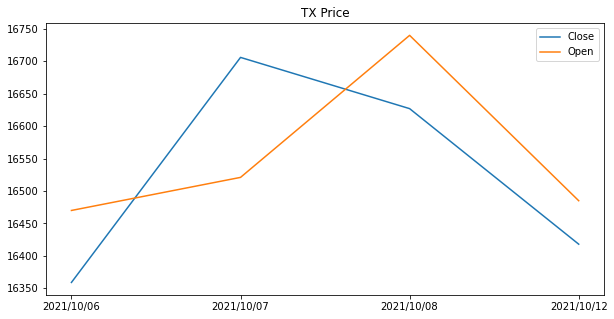

In [17]:
fig = plt.figure(figsize = (10, 5))
plt.title('TX Price')
plt.plot(df_tx['日期'], df_tx['最後成交價'])
plt.plot(df_tx['日期'], df_tx['開盤價'])
plt.legend(['Close', 'Open'])

## 4.2: 畫出台指期K線圖
- 股海小英雄youtube影片：[【股市分析】用K線預測大盤趨勢](https://youtu.be/FX6YAyOdEaE)

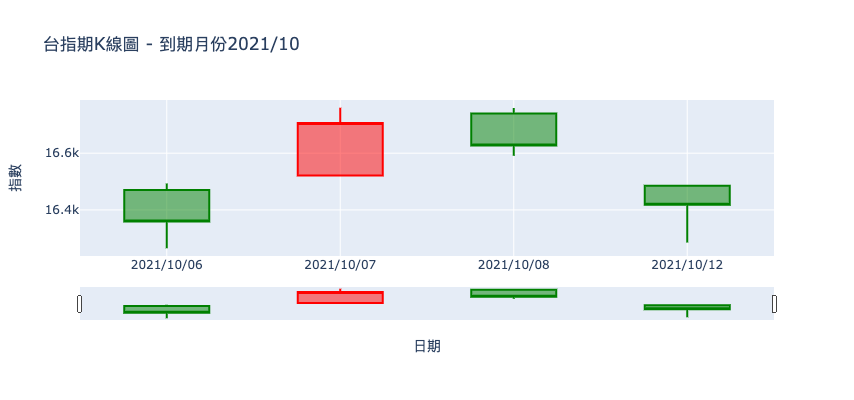

In [22]:
# 畫Ｋ線圖
fig = go.Figure(data = [go.Candlestick(x = df_tx['日期'],
                                       open = df_tx['開盤價'],
                                       high = df_tx['最高價'],
                                       low = df_tx['最低價'],
                                       close = df_tx['最後成交價'],
                                       increasing_line_color = 'red', 
                                       decreasing_line_color = 'green')])
# 設x軸標題
fig.update_xaxes(title_text = "日期", 
                 rangebreaks = [{ 'pattern': 'day of week', 'bounds': [6, 1]}])

# 設y軸標題
fig.update_yaxes(title_text = "指數")

# 設圖標及圖長寬
fig.update_layout(
    title_text = "台指期K線圖 - 到期月份2021/10 ",
    width = 800,
    height = 400
)

fig.show()